# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [94]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean


In [95]:
# reading movies and rating datset
movies=pd.read_csv("movies.csv")
ratings= pd.read_csv("ratings.csv")

In [96]:
# displaying the movies dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
# displaying the ratings dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
# Filtering ratings dataset for user 2
user_2_ratings = ratings[ratings["userId"] == 2]
print(user_2_ratings)


     userId  movieId  rating   timestamp
232       2      318     3.0  1445714835
233       2      333     4.0  1445715029
234       2     1704     4.5  1445715228
235       2     3578     4.0  1445714885
236       2     6874     4.0  1445714952
237       2     8798     3.5  1445714960
238       2    46970     4.0  1445715013
239       2    48516     4.0  1445715064
240       2    58559     4.5  1445715141
241       2    60756     5.0  1445714980
242       2    68157     4.5  1445715154
243       2    71535     3.0  1445714974
244       2    74458     4.0  1445714926
245       2    77455     3.0  1445714941
246       2    79132     4.0  1445714841
247       2    80489     4.5  1445715340
248       2    80906     5.0  1445715172
249       2    86345     4.0  1445715166
250       2    89774     5.0  1445715189
251       2    91529     3.5  1445714891
252       2    91658     2.5  1445714938
253       2    99114     3.5  1445714874
254       2   106782     5.0  1445714966
255       2   10

In [100]:
# Counting the number of movies user 2 has watched
num_movies_watched = user_2_ratings["movieId"].count()
num_movies_watched


29

In [101]:
# Counting the occurrences of each rating
rating_counts = user_2_ratings["rating"].value_counts().sort_index()
print(rating_counts)

rating
2.0    1
2.5    1
3.0    4
3.5    4
4.0    9
4.5    4
5.0    6
Name: count, dtype: int64


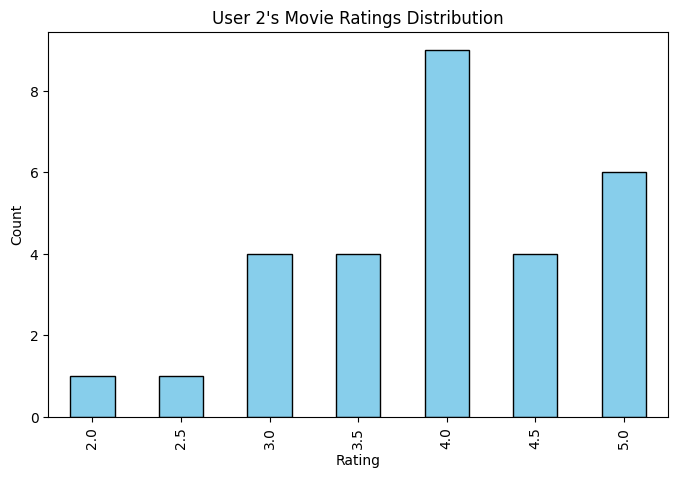

In [102]:
#  Plot the bar chart for ratings 
plt.figure(figsize=(8, 5))
rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("User 2's Movie Ratings Distribution")
# Show the plot
plt.show()

In [103]:
# Merge user 2's ratings with movie titles
user2_top_movies = user_2_ratings.merge(movies, on="movieId")
# Sort by rating in descending order
user2_top_movies = user2_top_movies.sort_values(by="rating", ascending=False)
# Displaying the top-rated movies
user2_top_movies.head(10)

,userId,movieId,rating,timestamp,title,genres
28,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
27,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
22,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18,2,89774,5.0,1445715189,Warrior (2011),Drama
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
16,2,80906,5.0,1445715172,Inside Job (2010),Documentary
2,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
8,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
10,2,68157,4.5,1445715154,Inglourious Basterds (2009),Action|Drama|War
15,2,80489,4.5,1445715340,"Town, The (2010)",Crime|Drama|Thriller


In [104]:
# cancating the datasets
new_df= pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)
new_df


,movieId,title,genres,userId,rating,timestamp
318,360.0,I Love Trouble (1994),Action|Comedy,95829.0,1404.0,3.769248e+11
356,412.0,"Age of Innocence, The (1993)",Drama,101385.0,1370.0,3.861652e+11
296,338.0,Virtuosity (1995),Action|Sci-Fi|Thriller,90621.0,1288.5,3.492043e+11
2571,3439.0,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,85236.0,1165.5,3.502700e+11
593,735.0,Cemetery Man (Dellamorte Dellamore) (1994),Horror,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...,...
9737,193581.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
9738,193583.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
9739,193585.0,Flint (2017),Drama,NaN,NaN,NaN
9740,193587.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


In [105]:

wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
wide.fillna(-1, inplace=True)

In [107]:
cor = wide.T.corr()

In [108]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.018916,0.059204,0.179894,0.121369,0.103828,0.141187,0.130393,0.052089,0.003243,...,0.064748,0.148329,0.191966,0.058442,0.135612,0.122529,0.259260,0.268676,0.086328,0.094546
2,0.018916,1.000000,-0.002936,-0.001895,0.015369,0.015436,0.025824,0.024174,-0.003570,0.065066,...,0.199690,0.010897,-0.004286,-0.005430,-0.008081,0.011038,0.006055,0.031115,0.025154,0.087520
3,0.059204,-0.002936,1.000000,-0.002646,0.007895,0.000028,-0.006534,0.007555,-0.003594,-0.006335,...,0.006577,0.005261,0.015396,-0.005467,0.003285,0.002749,0.019761,0.015210,-0.003342,0.014557
4,0.179894,-0.001895,-0.002646,1.000000,0.122238,0.069313,0.102479,0.060439,0.002010,0.018884,...,0.077143,0.116174,0.286354,0.041942,0.062982,0.165208,0.118940,0.124587,0.024487,0.060899
5,0.121369,0.015369,0.007895,0.122238,1.000000,0.298352,0.103712,0.429288,-0.004360,0.025950,...,0.060624,0.415991,0.098957,0.262230,0.141565,0.089978,0.149544,0.129392,0.256483,0.040026


In [109]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.000000
366    0.300528
378    0.277953
417    0.277085
550    0.252587
         ...   
234   -0.007649
605   -0.008081
312   -0.008135
104   -0.009044
217   -0.013622
Name: 2, Length: 610, dtype: float64

In [110]:
wide.loc[2].notna().equals(wide.loc[366].notna())

True

In [111]:
# keep the index as a column
new_df = new_df.reset_index()
new_df

,index,movieId,title,genres,userId,rating,timestamp
0,318,360.0,I Love Trouble (1994),Action|Comedy,95829.0,1404.0,3.769248e+11
1,356,412.0,"Age of Innocence, The (1993)",Drama,101385.0,1370.0,3.861652e+11
2,296,338.0,Virtuosity (1995),Action|Sci-Fi|Thriller,90621.0,1288.5,3.492043e+11
3,2571,3439.0,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,85236.0,1165.5,3.502700e+11
4,593,735.0,Cemetery Man (Dellamorte Dellamore) (1994),Horror,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...,...,...
14071,9737,193581.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
14072,9738,193583.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
14073,9739,193585.0,Flint (2017),Drama,NaN,NaN,NaN
14074,9740,193587.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


In [112]:
wide.fillna(-1, inplace=True)

In [113]:
#finding the similar user to user 2 using euclidean 
euclidean(wide.iloc[2], wide.iloc[336])

52.3975190252363

In [115]:
euclidean_distances = squareform(pdist(wide, metric=euclidean))

In [116]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [117]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [118]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [119]:
euclidean_df.loc[2].sort_values().loc[200]

91.43303560529968

In [120]:
# finding similar user using the cosine distance metric
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [121]:
cosine_df.loc[2].sort_values().loc[164]

0.08214016192139328

In [126]:
new_df

,index,movieId,title,genres,userId,rating,timestamp
0,318,360.0,I Love Trouble (1994),Action|Comedy,95829.0,1404.0,3.769248e+11
1,356,412.0,"Age of Innocence, The (1993)",Drama,101385.0,1370.0,3.861652e+11
2,296,338.0,Virtuosity (1995),Action|Sci-Fi|Thriller,90621.0,1288.5,3.492043e+11
3,2571,3439.0,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,85236.0,1165.5,3.502700e+11
4,593,735.0,Cemetery Man (Dellamorte Dellamore) (1994),Horror,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...,...,...
14071,9737,193581.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN
14072,9738,193583.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN
14073,9739,193585.0,Flint (2017),Drama,NaN,NaN,NaN
14074,9740,193587.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN


In [131]:
#We'll print movie ids that user_1 has not watched
user_1 = 2
user_2 = 336

# Filter movies rated by User 2
user_3_ratings = new_df[(new_df['userId'] == 3) & (new_df['rating'].notna())]

# Get movies rated by User 1
user_2_rated_movies = new_df[(new_df['userId'] == 2) & (new_df['rating'].notna())]['movieId']

# Filter out movies that User 2 has rated from User 3's ratings
movies_for_user_2 = user_2_ratings[~user_2_ratings['movieId'].isin(user_2_rated_movies)]

# Display the result
print(movies_for_user_2)

      index  movieId                                        title  \
6003   6835  61319.0                           Somers Town (2008)   
6068   5746  30850.0               Merchant of Venice, The (2004)   
6542   7899  95105.0    Madagascar 3: Europe's Most Wanted (2012)   
6550   5764  31162.0  Life and Death of Peter Sellers, The (2004)   

                                        genres  userId  rating     timestamp  
6003                                     Drama     3.0     5.0  1.306464e+09  
6068                                     Drama     3.0     5.0  1.306464e+09  
6542  Adventure|Animation|Children|Comedy|IMAX     3.0     4.5  1.306464e+09  
6550                              Comedy|Drama     3.0     4.5  1.306464e+09  


# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

- loaded both movies and ratings data set
- filtered the user 2 data from the ratings dataset
- counted the number of movies user 2 has watched (29 movies)
- then ploted the bar graph between ratings and count
- using euclidean distance and cosine distance and found the similar user to user 2
- then recommended movies to user 2 using similarity metrics.